<a href="https://colab.research.google.com/github/MoazzemhossainMoazz/EDGE_AI/blob/main/EDGE_classWork(5_8_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier

In [6]:
BC_data = pd.read_csv('/content/Breast_cancer_data.csv')

In [7]:
BC_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [8]:
BC_data.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [9]:
BC_data.shape

(569, 6)

In [10]:
BC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [11]:
BC_data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [12]:
print(f"There are {BC_data.duplicated().sum()} duplicates data")
BC_data.loc[BC_data.duplicated(keep=False)].sort_values(by=BC_data.columns.to_list())

There are 0 duplicates data


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis


In [13]:
BC_data.drop_duplicates(inplace=True)

In [14]:
BC_data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


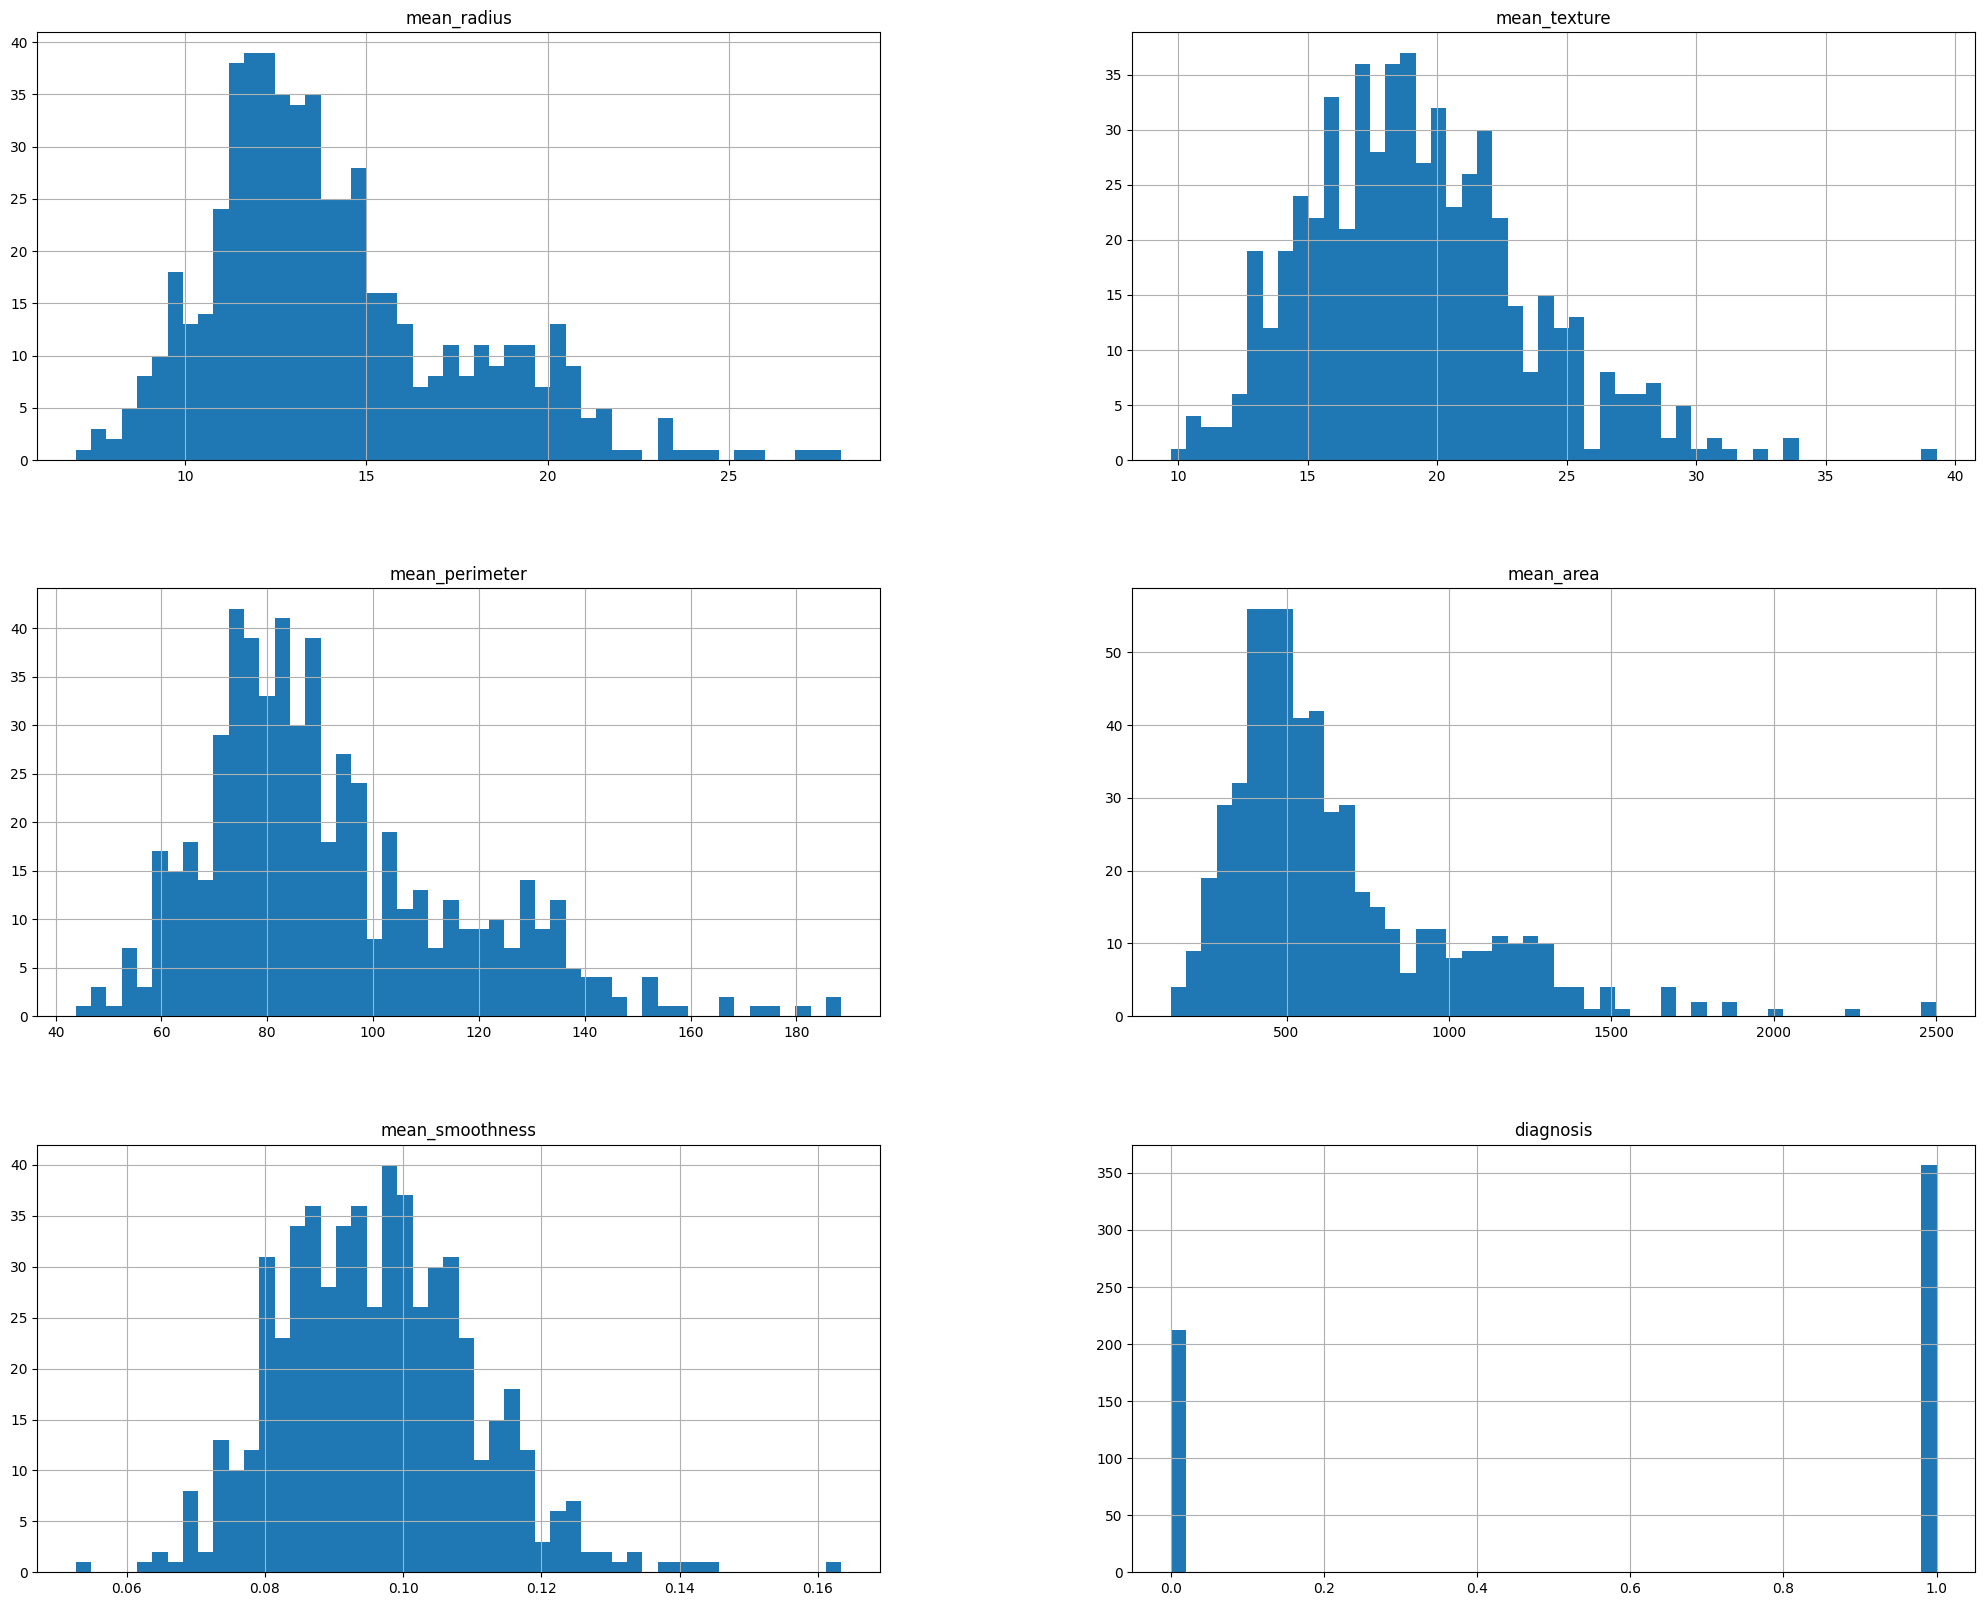

In [15]:
BC_data.hist(bins=50, figsize=(25, 20))
plt.show()

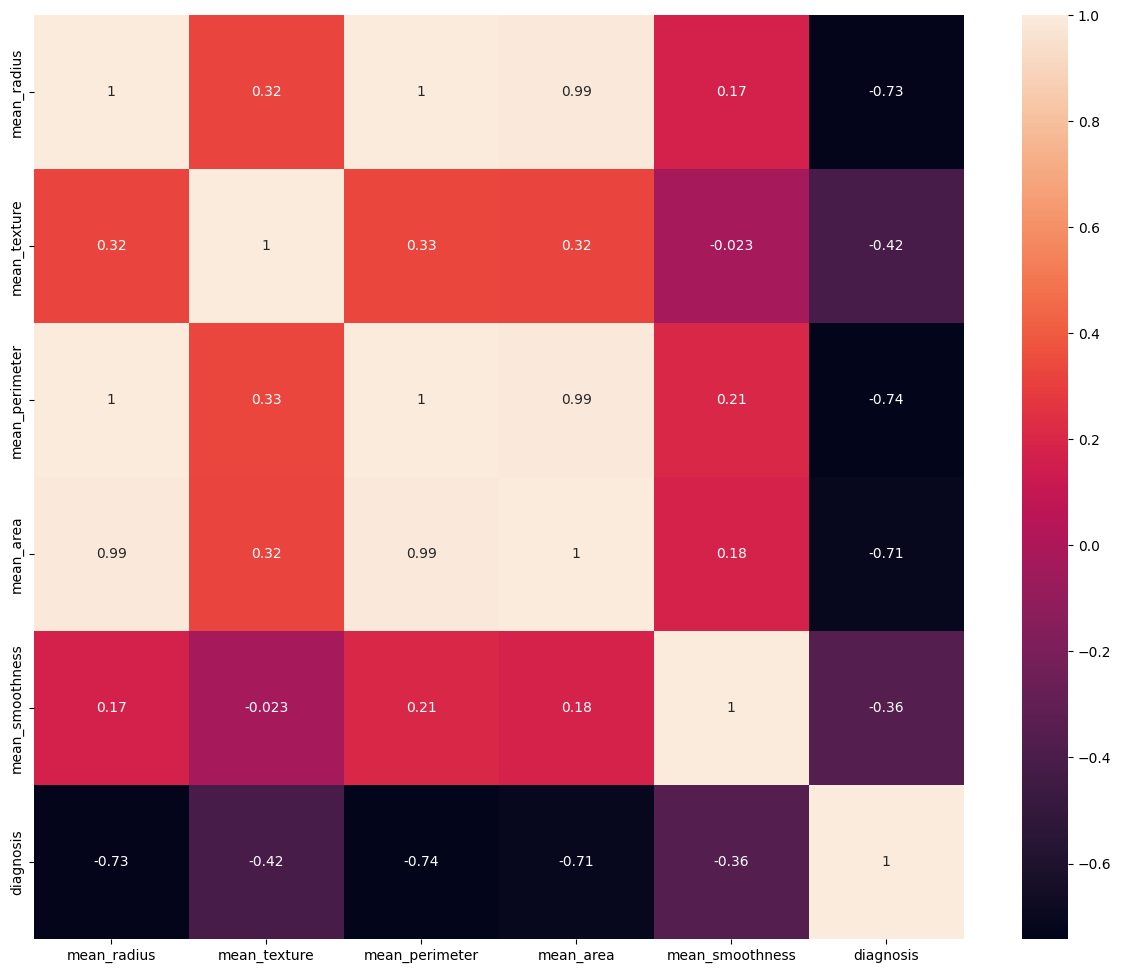

In [16]:
plt.figure(figsize=(15,12))
sns.heatmap(BC_data.corr(), annot=True)
plt.show()

In [17]:
correlation_matrix = BC_data.corr(method='pearson')
correlation_matrix

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


In [18]:
BC_data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [19]:
pip install imblearn

In [20]:
BC_data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [21]:
x = BC_data.drop(columns='diagnosis', axis=1)
y =BC_data['diagnosis']

In [22]:
print(x)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0          17.99         10.38          122.80     1001.0          0.11840
1          20.57         17.77          132.90     1326.0          0.08474
2          19.69         21.25          130.00     1203.0          0.10960
3          11.42         20.38           77.58      386.1          0.14250
4          20.29         14.34          135.10     1297.0          0.10030
..           ...           ...             ...        ...              ...
564        21.56         22.39          142.00     1479.0          0.11100
565        20.13         28.25          131.20     1261.0          0.09780
566        16.60         28.08          108.30      858.1          0.08455
567        20.60         29.33          140.10     1265.0          0.11780
568         7.76         24.54           47.92      181.0          0.05263

[569 rows x 5 columns]


In [23]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size = 0.2)

In [25]:
print(x.shape, x_train.shape, x_test.shape)

(569, 5) (455, 5) (114, 5)


#Used Random Forest Algorithm

In [29]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train.ravel())
predictions = RF.predict(x_test)

print(accuracy_score(y_test, predictions))

0.8947368421052632


#Used XGB Algorithm

In [30]:
XGB = XGBClassifier()
XGB.fit(x_train, y_train.ravel())
predictions2 = XGB.predict(x_test)

print(accuracy_score(y_test, predictions2))

0.9122807017543859


#Used KNN Algorithm

In [33]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train.ravel())
predictions3 = KNN.predict(x_test)

print(accuracy_score(y_test, predictions3))

0.8859649122807017
